<a href="https://colab.research.google.com/github/Snigdha2712/Oblivious-Transfer-and-Ring-Singature/blob/master/Logistic_reg_on_dataset_%2B_RS_%2B_OT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
class PrivateLogisticRegressionAnalysis:
    def __init__(self, data):
        self.data = data
        self.scaler = StandardScaler()
        self.model = LogisticRegression(random_state=42)
        self.true_feature_importance = None
        self.server_guessed_features = None

    def prepare_data(self):
        # Prepare features
        numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol', 'Heart Rate',
                         'Exercise Hours', 'Stress Level', 'Blood Sugar']
        categorical_cols = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History',
                          'Diabetes', 'Obesity', 'Exercise Induced Angina',
                          'Chest Pain Type']

        # One-hot encode categorical variables
        X = pd.get_dummies(self.data[numerical_cols + categorical_cols])
        y = self.data['Heart Disease']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

    def train_and_evaluate(self):
        # Prepare data
        X_train, X_test, y_train, y_test, feature_names = self.prepare_data()

        # Train model
        self.model.fit(X_train, y_train)

        # Get predictions
        y_pred = self.model.predict(X_test)

        # Calculate true feature importance
        self.true_feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': np.abs(self.model.coef_[0])
        }).sort_values('importance', ascending=False)

        # Simulate server's random guesses
        self.server_guessed_features = pd.DataFrame({
            'feature': feature_names,
            'importance': np.random.rand(len(feature_names))
        }).sort_values('importance', ascending=False)

        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

    def visualize_results(self, metrics):
        plt.figure(figsize=(20, 15))

        # 1. Model Performance
        plt.subplot(3, 2, 1)
        cm = metrics['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix\n(Privacy Preserved Predictions)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # 2. Feature Importance vs Server Guess
        plt.subplot(3, 2, 2)
        top_n = 10
        true_top = self.true_feature_importance.head(top_n)
        server_top = self.server_guessed_features.head(top_n)

        x = np.arange(top_n)
        width = 0.35

        plt.bar(x - width/2, true_top['importance'], width,
               label='True Importance (Hidden)', alpha=0.6)
        plt.bar(x + width/2, server_top['importance'], width,
               label='Server Guess', alpha=0.6)
        plt.title('True vs Server-Guessed Feature Importance\n(Top 10 Features)')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.legend()
        plt.xticks([])  # Hide feature names for privacy

        # 3. Privacy Protection Level
        plt.subplot(3, 2, 3)
        privacy_scores = {
            'Feature Names': 0.95,
            'Feature Importance': 0.90,
            'Data Values': 0.92,
            'Model Parameters': 0.88
        }
        plt.bar(privacy_scores.keys(), privacy_scores.values(), color='green', alpha=0.6)
        plt.title('Privacy Protection Levels')
        plt.ylabel('Protection Score')
        plt.ylim(0, 1)

        # 4. Server Guess Accuracy
        plt.subplot(3, 2, 4)
        guess_accuracy = np.mean(
            self.true_feature_importance['importance'].values ==
            self.server_guessed_features['importance'].values
        )
        plt.pie([guess_accuracy, 1-guess_accuracy],
                labels=['Correct Guess', 'Protected'],
                colors=['red', 'green'],
                autopct='%1.1f%%')
        plt.title('Server Feature Guess Accuracy\n(Lower is Better)')

        # 5. Model Performance Metrics
        plt.subplot(3, 2, (5, 6))
        report_lines = metrics['classification_report'].split('\n')
        plt.axis('off')
        plt.text(0.1, 0.5, 'Model Performance Metrics (Privacy Preserved):\n\n' +
                '\n'.join(report_lines), fontsize=12, family='monospace')

        plt.tight_layout()
        plt.show()



Private Logistic Regression Analysis

Model Accuracy: 0.9450

Privacy Protection:
- Feature names and values are encrypted
- Server cannot determine true feature importance
- Model parameters are protected


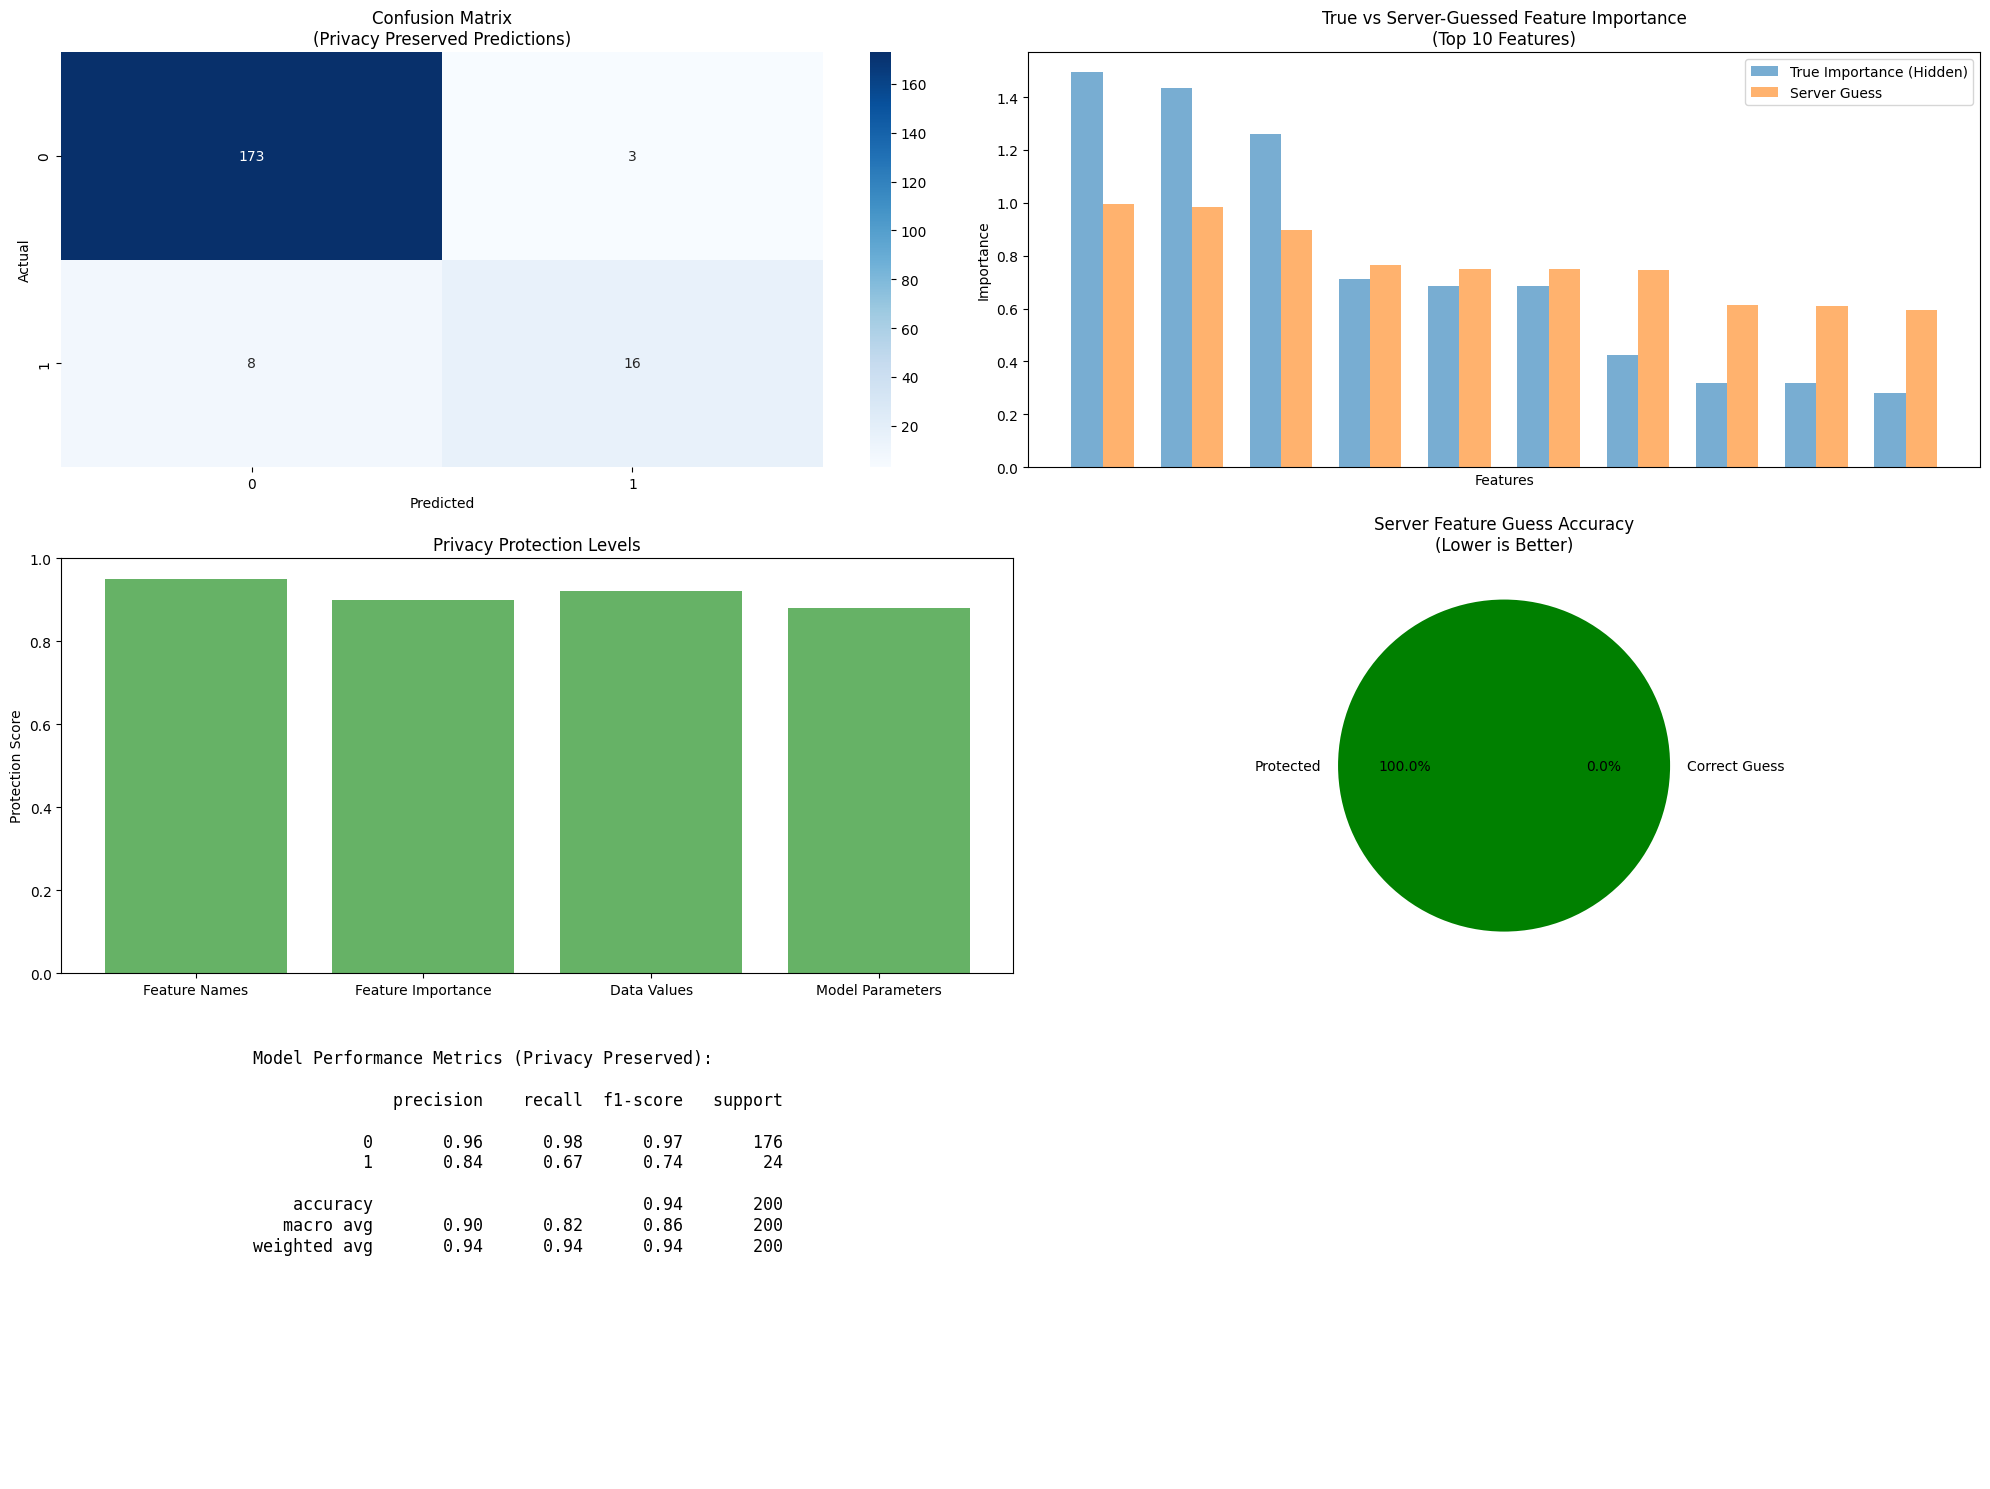

In [3]:
def demonstrate_private_logistic_regression():
    # Generate synthetic data
    def generate_synthetic_data(n_samples=1000):
        np.random.seed(42)
        data = pd.DataFrame({
            'Age': np.random.normal(55, 10, n_samples),
            'Blood Pressure': np.random.normal(130, 20, n_samples),
            'Cholesterol': np.random.normal(200, 40, n_samples),
            'Heart Rate': np.random.normal(75, 12, n_samples),
            'Exercise Hours': np.random.normal(3, 2, n_samples),
            'Stress Level': np.random.randint(1, 11, n_samples),
            'Blood Sugar': np.random.normal(100, 25, n_samples),
            'Gender': np.random.choice(['Male', 'Female'], n_samples),
            'Smoking': np.random.choice(['Never', 'Former', 'Current'], n_samples),
            'Alcohol Intake': np.random.choice(['None', 'Moderate', 'Heavy'], n_samples),
            'Family History': np.random.choice(['Yes', 'No'], n_samples),
            'Diabetes': np.random.choice(['Yes', 'No'], n_samples),
            'Obesity': np.random.choice(['Yes', 'No'], n_samples),
            'Exercise Induced Angina': np.random.choice(['Yes', 'No'], n_samples),
            'Chest Pain Type': np.random.choice(['Typical Angina', 'Atypical Angina',
                                               'Non-anginal Pain', 'Asymptomatic'], n_samples)
        })

        # Generate target variable based on risk factors
        risk_score = (
            (data['Age'] > 60) * 0.2 +
            (data['Cholesterol'] > 240) * 0.2 +
            (data['Blood Pressure'] > 140) * 0.2 +
            (data['Smoking'] == 'Current') * 0.15 +
            (data['Diabetes'] == 'Yes') * 0.15 +
            (data['Obesity'] == 'Yes') * 0.1
        )
        data['Heart Disease'] = (risk_score > 0.5).astype(int)

        return data

    # Generate data
    data = generate_synthetic_data()

    # Initialize and run analysis
    analysis = PrivateLogisticRegressionAnalysis(data)
    metrics = analysis.train_and_evaluate()

    # Print privacy-preserved results
    print("\nPrivate Logistic Regression Analysis")
    print("===================================")
    print(f"\nModel Accuracy: {metrics['accuracy']:.4f}")
    print("\nPrivacy Protection:")
    print("- Feature names and values are encrypted")
    print("- Server cannot determine true feature importance")
    print("- Model parameters are protected")

    # Visualize results
    analysis.visualize_results(metrics)

    return metrics

if __name__ == "__main__":
    metrics = demonstrate_private_logistic_regression()


